In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from unicodedata import normalize
from datetime import datetime, timedelta
import time
from workalendar.america import Brazil

from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import OneHotEncoder

---

# FEATURE ENGINEERING

In [2]:
cadastro = pd.read_csv('preprocessed data\\cadastrais_preprocessed.csv', parse_dates=['StoneCreatedDate', 'StoneFirstTransactionDate'], index_col=0)
tpv = pd.read_csv('preprocessed data\\tpv_mensal_preprocessed.csv', parse_dates=['mes_referencia'])

In [3]:
var_types = {'MCC':'category', 'MacroClassificacao':'category', 'segmento':'category', 'sub_segmento':'category', 
             'persona':'category', 'porte':'category', 'tipo_documento':'category', 'Estado':'category'}
cadastro = cadastro.astype(var_types)

In [4]:
cadastro

,StoneCreatedDate,StoneFirstTransactionDate,MCC,MacroClassificacao,segmento,sub_segmento,persona,porte,TPVEstimate,tipo_documento,Estado
id,,,,,,,,,,,
1,2018-12-12,2018-12-13,5942,Varejo,"Livrarias, Papelarias, Gráficas e Bancas",Livrarias e Papelarias,SMB - Medio Porte e Ticket Medio,50k-100k,71000,PJ,MG
2,2020-04-13,2020-04-14,5231,Bens duráveis,Materiais de Construção,Materiais de Construção,SMB - Pequeno Porte e Ticket Alto,10k-25k,10001,PF,RS
3,2019-05-31,2019-06-15,5411,Supermercado/Farmácia,Supermercados,Supermercados,Pequeno Empreendedor,2.5k-5k,3000,PF,RJ
4,2017-09-29,2017-10-02,4215,Serviços,Logística e Mobilidade,Delivery e Entrega,SMB - Medio Porte e Ticket Medio,25k-50k,25000,PJ,RJ
5,2019-01-31,2019-01-31,5698,Serviços,Serviços de Beleza e Estética,Salão de Beleza,SMB - Pequeno Porte e Ticket Medio,5k-10k,6000,PF,PE
...,...,...,...,...,...,...,...,...,...,...,...
206326,2019-05-16,2019-05-20,7997,Serviços recorrentes,Esporte e Fitness,Academias e Clubes,SMB - Pequeno Porte e Ticket Alto,10k-25k,4000,PF,SP
206327,2020-01-21,2020-01-22,5331,Bens duráveis,Lojas de Departamento,Lojas de Departamento,SMB - Pequeno Porte e Ticket Alto,10k-25k,20000,PJ,PE
206328,2019-07-15,2019-07-17,8021,Serviços,Serviços de Saúde e Clínicas,Odontologia,Pequeno Empreendedor,2.5k-5k,2000,PF,RJ


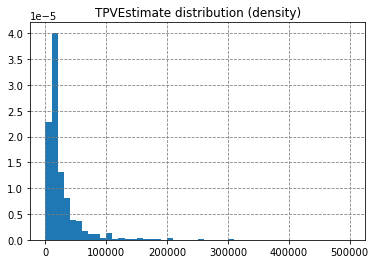

In [5]:
plt.hist(cadastro[['TPVEstimate']], bins=50, range=(0, 500000), density=True)

plt.title('TPVEstimate distribution (density)')
plt.grid(ls='--', color='gray')
plt.show()

In [6]:
qt = QuantileTransformer(n_quantiles=50, random_state=0, output_distribution='normal')
cadastro['TPVEstimate normalized'] = qt.fit_transform(cadastro[['TPVEstimate']])

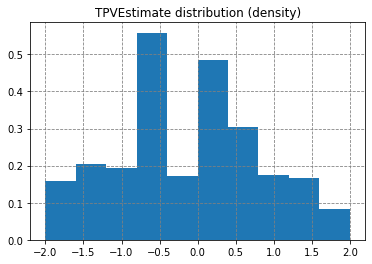

In [7]:
plt.hist(cadastro[['TPVEstimate normalized']], bins=10, range=(-2, 2), density=True)

plt.title('TPVEstimate distribution (density)')
plt.grid(ls='--', color='gray')
plt.show()

In [8]:
cadastro['TPVEstimate sqrt'] = (cadastro[['TPVEstimate']])**(1/32)

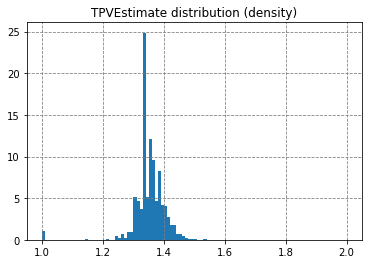

In [9]:
plt.hist(cadastro[['TPVEstimate sqrt']], bins=100, range=(1, 2), density=True)

plt.title('TPVEstimate distribution (density)')
plt.grid(ls='--', color='gray')
plt.show()

---

In [10]:
cadastro

,StoneCreatedDate,StoneFirstTransactionDate,MCC,MacroClassificacao,segmento,sub_segmento,persona,porte,TPVEstimate,tipo_documento,Estado,TPVEstimate normalized,TPVEstimate sqrt
id,,,,,,,,,,,,,
1,2018-12-12,2018-12-13,5942,Varejo,"Livrarias, Papelarias, Gráficas e Bancas",Livrarias e Papelarias,SMB - Medio Porte e Ticket Medio,50k-100k,71000,PJ,MG,1.552286,1.417757
2,2020-04-13,2020-04-14,5231,Bens duráveis,Materiais de Construção,Materiais de Construção,SMB - Pequeno Porte e Ticket Alto,10k-25k,10001,PF,RS,-0.179960,1.333526
3,2019-05-31,2019-06-15,5411,Supermercado/Farmácia,Supermercados,Supermercados,Pequeno Empreendedor,2.5k-5k,3000,PF,RJ,-1.394173,1.284281
4,2017-09-29,2017-10-02,4215,Serviços,Logística e Mobilidade,Delivery e Entrega,SMB - Medio Porte e Ticket Medio,25k-50k,25000,PJ,RJ,0.627072,1.372258
5,2019-01-31,2019-01-31,5698,Serviços,Serviços de Beleza e Estética,Salão de Beleza,SMB - Pequeno Porte e Ticket Medio,5k-10k,6000,PF,PE,-1.022728,1.312403
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206326,2019-05-16,2019-05-20,7997,Serviços recorrentes,Esporte e Fitness,Academias e Clubes,SMB - Pequeno Porte e Ticket Alto,10k-25k,4000,PF,SP,-1.329529,1.295879
206327,2020-01-21,2020-01-22,5331,Bens duráveis,Lojas de Departamento,Lojas de Departamento,SMB - Pequeno Porte e Ticket Alto,10k-25k,20000,PJ,PE,0.393598,1.362722
206328,2019-07-15,2019-07-17,8021,Serviços,Serviços de Saúde e Clínicas,Odontologia,Pequeno Empreendedor,2.5k-5k,2000,PF,RJ,-1.440895,1.268111


In [11]:
enc = OneHotEncoder(handle_unknown='ignore', sparse=False, dtype=int)
data = enc.fit_transform(cadastro[['sub_segmento', 'persona', 'porte', 'tipo_documento', 'Estado']])
categories_enc = enc.categories_

In [12]:
columns = []
for i in range(len(categories_enc)):
    columns += list(categories_enc[i])

In [13]:
cadastro_dummies = pd.DataFrame(data=data, columns=columns, index=cadastro.index)

---

In [14]:
cadastro

,StoneCreatedDate,StoneFirstTransactionDate,MCC,MacroClassificacao,segmento,sub_segmento,persona,porte,TPVEstimate,tipo_documento,Estado,TPVEstimate normalized,TPVEstimate sqrt
id,,,,,,,,,,,,,
1,2018-12-12,2018-12-13,5942,Varejo,"Livrarias, Papelarias, Gráficas e Bancas",Livrarias e Papelarias,SMB - Medio Porte e Ticket Medio,50k-100k,71000,PJ,MG,1.552286,1.417757
2,2020-04-13,2020-04-14,5231,Bens duráveis,Materiais de Construção,Materiais de Construção,SMB - Pequeno Porte e Ticket Alto,10k-25k,10001,PF,RS,-0.179960,1.333526
3,2019-05-31,2019-06-15,5411,Supermercado/Farmácia,Supermercados,Supermercados,Pequeno Empreendedor,2.5k-5k,3000,PF,RJ,-1.394173,1.284281
4,2017-09-29,2017-10-02,4215,Serviços,Logística e Mobilidade,Delivery e Entrega,SMB - Medio Porte e Ticket Medio,25k-50k,25000,PJ,RJ,0.627072,1.372258
5,2019-01-31,2019-01-31,5698,Serviços,Serviços de Beleza e Estética,Salão de Beleza,SMB - Pequeno Porte e Ticket Medio,5k-10k,6000,PF,PE,-1.022728,1.312403
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206326,2019-05-16,2019-05-20,7997,Serviços recorrentes,Esporte e Fitness,Academias e Clubes,SMB - Pequeno Porte e Ticket Alto,10k-25k,4000,PF,SP,-1.329529,1.295879
206327,2020-01-21,2020-01-22,5331,Bens duráveis,Lojas de Departamento,Lojas de Departamento,SMB - Pequeno Porte e Ticket Alto,10k-25k,20000,PJ,PE,0.393598,1.362722
206328,2019-07-15,2019-07-17,8021,Serviços,Serviços de Saúde e Clínicas,Odontologia,Pequeno Empreendedor,2.5k-5k,2000,PF,RJ,-1.440895,1.268111


In [15]:
tpv = tpv.sort_values(['id', 'mes_referencia'])
tpv

,id,mes_referencia,TPV_mensal
0,1,2018-12-31,10107.90
1,1,2019-01-31,6023.15
2,1,2019-02-28,4347.30
3,1,2019-03-31,9769.75
4,1,2019-04-30,6701.70
...,...,...,...
3066767,206329,2020-07-31,60213.99
3066768,206330,2020-04-30,104.50
3066769,206330,2020-05-31,18335.62
3066770,206330,2020-06-30,15098.04


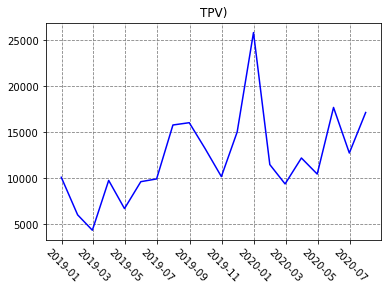

In [16]:
i = 1
    
plt.plot(tpv.loc[tpv['id'] == i, 'mes_referencia'], tpv.loc[tpv['id'] == i, 'TPV_mensal'], color='blue')

plt.xticks(rotation=-45)
plt.title('TPV')
plt.grid(ls='--', color='gray')
plt.show()

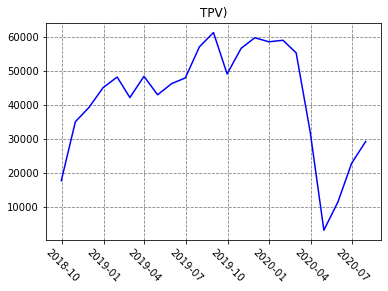

In [17]:
i = 7850
    
plt.plot(tpv.loc[tpv['id'] == i, 'mes_referencia'], tpv.loc[tpv['id'] == i, 'TPV_mensal'], color='blue')

plt.xticks(rotation=-45)
plt.title('TPV')
plt.grid(ls='--', color='gray')
plt.show()

---

In [18]:
cadastro.head()

,StoneCreatedDate,StoneFirstTransactionDate,MCC,MacroClassificacao,segmento,sub_segmento,persona,porte,TPVEstimate,tipo_documento,Estado,TPVEstimate normalized,TPVEstimate sqrt
id,,,,,,,,,,,,,
1,2018-12-12,2018-12-13,5942,Varejo,"Livrarias, Papelarias, Gráficas e Bancas",Livrarias e Papelarias,SMB - Medio Porte e Ticket Medio,50k-100k,71000,PJ,MG,1.552286,1.417757
2,2020-04-13,2020-04-14,5231,Bens duráveis,Materiais de Construção,Materiais de Construção,SMB - Pequeno Porte e Ticket Alto,10k-25k,10001,PF,RS,-0.179960,1.333526
3,2019-05-31,2019-06-15,5411,Supermercado/Farmácia,Supermercados,Supermercados,Pequeno Empreendedor,2.5k-5k,3000,PF,RJ,-1.394173,1.284281
4,2017-09-29,2017-10-02,4215,Serviços,Logística e Mobilidade,Delivery e Entrega,SMB - Medio Porte e Ticket Medio,25k-50k,25000,PJ,RJ,0.627072,1.372258
5,2019-01-31,2019-01-31,5698,Serviços,Serviços de Beleza e Estética,Salão de Beleza,SMB - Pequeno Porte e Ticket Medio,5k-10k,6000,PF,PE,-1.022728,1.312403


In [35]:
drop_columns = ['StoneCreatedDate', 'StoneFirstTransactionDate', 'MCC', 'MacroClassificacao', 'segmento', 'sub_segmento',
                'persona', 'porte', 'TPVEstimate', 'tipo_documento', 'Estado']
df1 = cadastro.drop(drop_columns, axis='columns').join(cadastro_dummies)

df1

,TPVEstimate normalized,TPVEstimate sqrt,Academias e Clubes,"Acessórios, Bolsas e Bijuterias",Alimentação Rápida,Anúncios,Armarinhos e Tecido,Artigos Esportivos,Artigos Religiosos e Antiguidades,Artigos de Decoração,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
id,,,,,,,,,,,,,,,,,,,,,
1,1.552286,1.417757,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.179960,1.333526,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,-1.394173,1.284281,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0.627072,1.372258,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,-1.022728,1.312403,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206326,-1.329529,1.295879,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
206327,0.393598,1.362722,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
206328,-1.440895,1.268111,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [20]:
tpv['mes'] = tpv['mes_referencia'].dt.month
tpv['ano'] = tpv['mes_referencia'].dt.year

In [21]:
tpv

,id,mes_referencia,TPV_mensal,mes,ano
0,1,2018-12-31,10107.90,12,2018
1,1,2019-01-31,6023.15,1,2019
2,1,2019-02-28,4347.30,2,2019
3,1,2019-03-31,9769.75,3,2019
4,1,2019-04-30,6701.70,4,2019
...,...,...,...,...,...
3066767,206329,2020-07-31,60213.99,7,2020
3066768,206330,2020-04-30,104.50,4,2020
3066769,206330,2020-05-31,18335.62,5,2020
3066770,206330,2020-06-30,15098.04,6,2020


In [22]:
print('min: ', tpv['mes_referencia'].min().date())
print('max: ', tpv['mes_referencia'].max().date())

min:  2017-07-31
max:  2020-07-31


In [23]:
cal = Brazil()
holiday_list = []
for year in [2017, 2018, 2019, 2020, 2021]:
    holiday_list += (cal.holidays(year))
    
holiday_list = [x[0] for x in holiday_list]

In [24]:
tpv['work_days'] = tpv['mes_referencia'].astype(str).apply(lambda x: np.busday_count(str(datetime.strptime(x[0:7], "%Y-%m").date()), 
                                                        str((datetime.strptime(x, "%Y-%m-%d") + timedelta(days=1)).date()), 
                                                        holidays=holiday_list))

In [28]:
enc = OneHotEncoder(handle_unknown='ignore', sparse=False, dtype=int)
data = enc.fit_transform(tpv[['mes', 'ano']])
categories_enc = enc.categories_

In [29]:
columns = []
for i in range(len(categories_enc)):
    columns += list(categories_enc[i])

In [30]:
tpv_dummies = pd.DataFrame(data=data, columns=columns, index=tpv.index)

In [32]:
tpv['TPV_mensal/work_day'] = tpv['TPV_mensal']/tpv['work_days']

In [38]:
drop_columns = ['mes', 'ano']
df2 = tpv.drop(drop_columns, axis='columns').join(tpv_dummies)
df2 = df2.set_index('id')

df2

,mes_referencia,TPV_mensal,work_days,TPV_mensal/work_day,1,2,3,4,5,6,7,8,9,10,11,12,2017,2018,2019,2020
id,,,,,,,,,,,,,,,,,,,,
1,2018-12-31,10107.90,20,505.395000,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,2019-01-31,6023.15,22,273.779545,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2019-02-28,4347.30,20,217.365000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2019-03-31,9769.75,21,465.226190,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2019-04-30,6701.70,22,304.622727,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206329,2020-07-31,60213.99,23,2617.999565,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
206330,2020-04-30,104.50,21,4.976190,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
206330,2020-05-31,18335.62,20,916.781000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


---

In [56]:
df = df2.join(df1)
df

,mes_referencia,TPV_mensal,work_days,TPV_mensal/work_day,1,2,3,4,5,6,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
id,,,,,,,,,,,,,,,,,,,,,
1,2018-12-31,10107.90,20,505.395000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2019-01-31,6023.15,22,273.779545,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2019-02-28,4347.30,20,217.365000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2019-03-31,9769.75,21,465.226190,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2019-04-30,6701.70,22,304.622727,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206329,2020-07-31,60213.99,23,2617.999565,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
206330,2020-04-30,104.50,21,4.976190,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
206330,2020-05-31,18335.62,20,916.781000,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df = df.reset_index().set_index(['mes_referencia', 'id'])

In [58]:
df

,,TPV_mensal,work_days,TPV_mensal/work_day,1,2,3,4,5,6,7,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
mes_referencia,id,,,,,,,,,,,,,,,,,,,,,
2018-12-31,1,10107.90,20,505.395000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-31,1,6023.15,22,273.779545,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-02-28,1,4347.30,20,217.365000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-03-31,1,9769.75,21,465.226190,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-04-30,1,6701.70,22,304.622727,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-31,206329,60213.99,23,2617.999565,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2020-04-30,206330,104.50,21,4.976190,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-05-31,206330,18335.62,20,916.781000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
df['covid'] = 0
df.loc[(df.index.get_level_values('mes_referencia') > '2020-03'), 'covid'] = 1

In [60]:
df

,,TPV_mensal,work_days,TPV_mensal/work_day,1,2,3,4,5,6,7,...,RJ,RN,RO,RR,RS,SC,SE,SP,TO,covid
mes_referencia,id,,,,,,,,,,,,,,,,,,,,,
2018-12-31,1,10107.90,20,505.395000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-31,1,6023.15,22,273.779545,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-02-28,1,4347.30,20,217.365000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-03-31,1,9769.75,21,465.226190,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-04-30,1,6701.70,22,304.622727,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-31,206329,60213.99,23,2617.999565,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2020-04-30,206330,104.50,21,4.976190,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2020-05-31,206330,18335.62,20,916.781000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [61]:
df.to_csv('model data//model_data.csv')

---